# Vectorized computation and data structures

In the context of Natural Language Processing (NLP) and data science, efficient computation and data handling are crucial for handling large datasets and complex algorithms. Vectorized computation and data structures like NumPy and pandas play a pivotal role in this efficiency. Let's delve into the concepts, their significance, and how they relate to broader statistical concepts in data science, mathematics, and social sciences.

### Vectorized Computation

**Context and Importance:** Vectorized computation refers to performing operations on entire arrays or matrices in a single step, rather than using loops over individual elements. This approach leverages optimized. In NLP, where operations on large text corpora and word embeddings are common, vectorized computation can drastically reduce execution time.

**NumPy:** NumPy (Numerical Python) is a foundational package for scientific computing in Python. It provides an N-dimensional array object which is a key data structure for vectorized operations. NumPy arrays support a wide range of mathematical operations that can be performed over the whole array efficiently and succinctly. This is particularly beneficial in NLP for tasks like vector operations in semantic analysis, where each word or document can be represented as a high-dimensional vector.

**Tensors:** generalizes the concept of vectors and matrices to higher dimensions. Tensors are the basic building blocks in these frameworks, used to represent data or parameters (like weights and biases in neural networks). While a Numpy array is conceptually similar to a tensor, tensors in deep learning frameworks are designed with additional capabilities, such as the ability to run on GPUs for faster computation and to automatically compute gradients (a feature essential for training neural networks). 

### Data Structures: pandas

**pandas Overview:** pandas is a Python library providing high-level data structures and a vast array of tools for data analysis. At its core, the DataFrame is the most noteworthy data structure in pandas, essentially a tabular data structure with labeled axes (rows and columns). For NLP, pandas DataFrames facilitate the manipulation of textual data, enabling tasks like data cleaning, transformation, and aggregation to be performed effortlessly.

**Significance in NLP:** In NLP projects, one often starts with structured data from various sources like CSV files, databases, or JSON. pandas makes it easy to load, preprocess, and explore this textual data. For example, you can easily apply transformations to text data (like tokenization, stemming, or lemmatization) across large datasets and analyze the distribution of words or phrases.

## (Super) Simple example

In [1]:
import numpy as np
import pandas as pd

# Example with NumPy: Calculate the word length of each word in an array
words = np.array(["natural", "language", "processing"])
word_lengths = np.vectorize(len)(words)
print(word_lengths)

# Example with pandas: Create a DataFrame and process textual data
data = {'text': ["Natural Language Processing", "Data Science", "Machine Learning"]}
df = pd.DataFrame(data)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print(df)

[ 7  8 10]
                          text  word_count
0  Natural Language Processing           3
1                 Data Science           2
2             Machine Learning           2


## Exploring pandas

In [23]:
import pandas as pd

# load 10,000 rows of the dataset
eczema_df = pd.read_csv('../datasets/eczema.csv', nrows=10000)

### Quick view of data

In [24]:
eczema_df.head()

,docID,text
0,0,looking for that little bit of extra support t...
1,1,hi everyone my name is azizah and i am conduct...
2,2,i am currently doing an extended project quali...
3,3,hi alice i have pompholyx to clear an infected...
4,4,hello i am in my third year at derby universit...


In [25]:
eczema_df.tail()

,docID,text
9995,11658,my baby ha this rash on her face it really red...
9996,11659,my lo little one eczema is severe we have used...
9997,11660,if you want to know what helped u i justed pos...
9998,11661,how long after you moved did you see improveme...
9999,11662,i am also going through the same thing but my ...


In [26]:
eczema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   docID   10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [27]:
eczema_df.shape

(10000, 2)

### Data Munging in pandas

In [28]:
# how many people talk about lotions?
eczema_df['lotion'] = eczema_df['text'].str.contains("lotion")
eczema_df[eczema_df['lotion'] == True]

,docID,text,lotion
7,8,hi everyone i have suffered from sever eczema ...,True
57,67,1 can you share experience of eczema before yo...,True
83,98,update for whoever stumble across this and is ...,True
85,101,my niece recently recommends a soap and lotion...,True
94,111,i had eczema and i am cured of it have been ec...,True
...,...,...,...
9962,11618,you said it come and go a big bite will not co...,True
9967,11625,hello â thanks so much for this board and all ...,True
9978,11640,yes i agree with above comment were doing the ...,True
9982,11644,i stopped using cortisone for my los eczema hi...,True


In [29]:
eczema_df['lotion'] = eczema_df['text'].str.contains("lotion", case=False)
eczema_df[eczema_df['lotion'] == True]

,docID,text,lotion
7,8,hi everyone i have suffered from sever eczema ...,True
57,67,1 can you share experience of eczema before yo...,True
83,98,update for whoever stumble across this and is ...,True
85,101,my niece recently recommends a soap and lotion...,True
94,111,i had eczema and i am cured of it have been ec...,True
...,...,...,...
9962,11618,you said it come and go a big bite will not co...,True
9967,11625,hello â thanks so much for this board and all ...,True
9978,11640,yes i agree with above comment were doing the ...,True
9982,11644,i stopped using cortisone for my los eczema hi...,True


In [30]:
eczema_df['lotion'] = eczema_df['text'].str.contains("lot[io]+n", regex=True, case=False)
eczema_df[eczema_df['lotion'] == True]

,docID,text,lotion
7,8,hi everyone i have suffered from sever eczema ...,True
57,67,1 can you share experience of eczema before yo...,True
83,98,update for whoever stumble across this and is ...,True
85,101,my niece recently recommends a soap and lotion...,True
94,111,i had eczema and i am cured of it have been ec...,True
...,...,...,...
9962,11618,you said it come and go a big bite will not co...,True
9967,11625,hello â thanks so much for this board and all ...,True
9978,11640,yes i agree with above comment were doing the ...,True
9982,11644,i stopped using cortisone for my los eczema hi...,True


In [31]:
eczema_df['age'] = eczema_df['text'].str.contains("\d+", regex=True, case=False)
eczema_df[eczema_df['age'] == True]

,docID,text,lotion,age
3,3,hi alice i have pompholyx to clear an infected...,False,True
4,4,hello i am in my third year at derby universit...,False,True
6,7,during late 2016 talkhealth carried out some p...,False,True
7,8,hi everyone i have suffered from sever eczema ...,True,True
11,13,hello im a designer from london currently rese...,False,True
...,...,...,...,...
9991,11654,we have used protopic on my 7 year old because...,False,True
9992,11655,a friend of mine s son had severe eczema on hi...,False,True
9994,11657,my 5 mo ha had sensitive skin from the beginni...,False,True
9997,11660,if you want to know what helped u i justed pos...,False,True


### Quick tutorial on Regular Expressions

In the context of Natural Language Processing (NLP), understanding and leveraging Regular Expressions (regex) is a fundamental skill. Regex is a powerful tool used for searching, manipulating, and analyzing text data by defining specific patterns. It's particularly useful in text preprocessing, data cleaning, and information extraction tasks.

**Regular Expressions** are sequences of characters that form a search pattern. They can be used to check if a string contains the specified search pattern, to replace the search pattern with a specified text, or to split a string on the specified search pattern.

- **Literals**: These are the simplest form of regex, where the search pattern matches the exact character sequence. For example, the regex `data` will match "data" in the string "data science".

- **Metacharacters**: These are characters with a special meaning. Some of the most common metacharacters include:
  - `.` (dot): Matches any single character except newline. For example, `a.b` matches "acb" or "a2b".
  - `^` (caret): Matches the start of a string. For example, `^data` matches "data" in "data science" but not in "my data science project".
  - `$` (dollar): Matches the end of a string. For example, `end$` matches "the end" in "This is the end".
  - `*` (asterisk): Matches 0 or more occurrences of the preceding element. For example, `a*b` matches "b", "ab", "aab", etc.
  - `+` (plus): Matches 1 or more occurrences of the preceding element. For example, `a+b` matches "ab", "aab", but not "b".
  - `?` (question mark): Matches 0 or 1 occurrence of the preceding element. For example, `a?b` matches "b" or "ab".

- **Brackets**: Used for specifying a set of characters to match.
  - `[abc]`: Matches any one of the characters a, b, or c.
  - `[^abc]`: Matches any character except a, b, or c.
  
- **Quantifiers**: Specify how many instances of a character, group, or character class must be present in the input for a match to be found.
  - `{n}`: Exactly n occurrences. For example, `a{3}` matches exactly three 'a' characters.
  - `{n,}`: At least n occurrences. For example, `a{2,}` matches two or more 'a' characters.
  - `{n,m}`: Between n and m occurrences, inclusive. For example, `a{2,4}` matches between two and four 'a' characters.

- **Parentheses** are used for grouping characters or patterns. For example, `(abc)+` matches one or more repetitions of "abc".

Think of regex like a secret code that helps you find specific patterns in a giant wall of text. It's like playing "Where's Waldo?" but for words or letters. You have special symbols that tell your search tool exactly what to look for, whether it's anything that looks like "Waldo", or finding Waldo only if he's at the beginning or end of the page.

Regular Expressions are a versatile and powerful tool in text processing and NLP. By mastering regex, you can efficiently search, replace, and manipulate text data, which is crucial for preparing and analyzing textual data in Data Science. Start small, practice with real text data, and gradually, you'll find regex to be an indispensable part of your NLP toolkit.

In [32]:
import re

# Finding if a pattern exists in a string
if re.search(r'^Data', 'Data Science'):
    print("Pattern found!")

# Replacing a pattern in a string
replaced_text = re.sub(r'Science', 'Analysis', 'Data Science')
print(replaced_text)  # Outputs: Data Analysis

# Splitting a string based on a pattern
split_text = re.split(r'\s+', 'Data Science is cool')
print(split_text)  # Outputs: ['Data', 'Science', 'is', 'cool']

# Extracting all matches of a pattern
matches = re.findall(r'\bData\b', 'Data Science and Data Analysis')
print(matches)  # Outputs: ['Data', 'Data']

Pattern found!
Data Analysis
['Data', 'Science', 'is', 'cool']
['Data', 'Data']


### Let's dig into some more pandas features

We can use additional libraries with our pandas dataframe to perform more complex operations. For example, let's explore how different NLP libraries can be used with pandas to perform text preprocessing and analysis.

#### Tokenization

In NLP, tokenization serves as a preprocessing step where text is segmented into tokens that are useful for subsequent tasks like parsing, syntax analysis, or feature extraction. The process can vary in complexity depending on the language and the specific application. For instance, tokenizing a sentence in English might simply involve splitting it by spaces and punctuation, but languages without clear word boundaries (e.g., Chinese) require more sophisticated methods. The choice of what constitutes a token is crucial and depends on the task at hand; for example, in some contexts, individual words are tokens, while in others, meaningful phrases or even individual characters might be considered tokens.

##### NLTK

In [33]:
!pip install nltk --quiet

In [34]:
# let's tokenize our text column
import nltk
from nltk.tokenize import word_tokenize

In [35]:
eczema_df['nltk_tokens'] = eczema_df['text'].apply(word_tokenize)
eczema_df['nltk_tokens'].head()

0    [looking, for, that, little, bit, of, extra, s...
1    [hi, everyone, my, name, is, azizah, and, i, a...
2    [i, am, currently, doing, an, extended, projec...
3    [hi, alice, i, have, pompholyx, to, clear, an,...
4    [hello, i, am, in, my, third, year, at, derby,...
Name: nltk_tokens, dtype: object

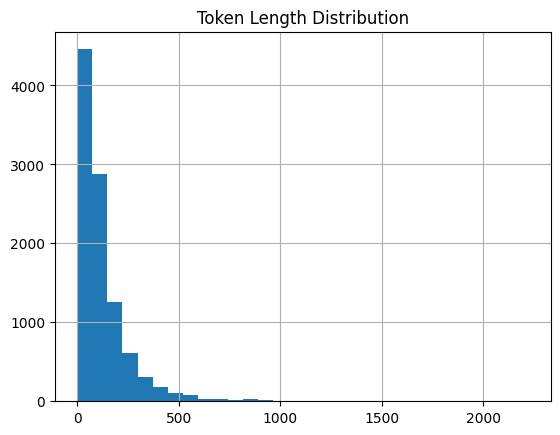

In [36]:
# plot the token length distribution using pandas
import matplotlib.pyplot as plt

eczema_df['nltk_tokens'].apply(len).hist(bins=30)
plt.title('Token Length Distribution')
plt.show()

In [37]:
# look at the longest token
max_token = eczema_df['nltk_tokens'].apply(len).idxmax()
print(eczema_df.loc[max_token, 'nltk_tokens'], eczema_df.loc[max_token, 'text'])


['hello', 'everyone', 'i', 'just', 'joined', 'the', 'site', 'about', 'an', 'hour', 'ago', 'and', 'i', 'thought', 'that', 'i', 'would', 'share', 'my', 'story', 'i', 'am', '21', 'year', 'living', 'in', 'california', 'i', 'have', 'had', 'eczema', 'a', 'long', 'a', 'i', 'can', 'remember', 'i', 'have', 'always', 'gotten', 'breakout', 'all', 'over', 'my', 'body', 'arm', 'chest', 'back', 'leg', 'foot', 'you', 'name', 'it', 'but', 'i', 'especially', 'remember', 'it', 'being', 'bad', 'on', 'my', 'leg', 'when', 'i', 'wa', 'little', 'from', 'about', '4th', 'grade', 'up', 'until', 'the', 'middle', 'of', 'high', 'school', 'i', 'wore', 'sock', 'up', 'to', 'my', 'knee', 'just', 'so', 'that', 'i', 'could', 'bare', 'to', 'wear', 'short', 'it', 'didn', 't', 'help', 'either', 'that', 'i', 'always', 'played', 'sport', 'mostly', 'soccer', 'which', 'didn', 't', 'help', 'the', 'condition', 'i', 'can', 't', 'even', 'remember', 'a', 'single', 'soccer', 'game', 'growing', 'up', 'where', 'i', 'wasn', 't', 'const

#### SpaCy

In [38]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm --quiet

2024-02-01 13:15:50.058612: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 13:15:50.063632: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 13:15:50.081648: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 13:15:50.081661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 13:15:50.081680: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [39]:
# tokenize with spacy
import spacy

nlp = spacy.load('en_core_web_sm')

In [40]:
eczema_df['spacy_tokens'] = eczema_df['text'].apply(lambda x: [token.text for token in nlp(x)])

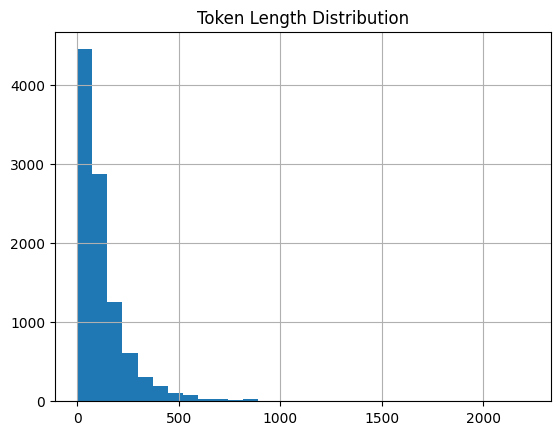

In [41]:
# plot the token length distribution using pandas
eczema_df['spacy_tokens'].apply(len).hist(bins=30)
plt.title('Token Length Distribution')
plt.show()

In [42]:
# example of differences between spacy and nltk tokenization
eczema_df[eczema_df['nltk_tokens'].apply(len) != eczema_df['spacy_tokens'].apply(len)]

,docID,text,lotion,age,nltk_tokens,spacy_tokens
11,13,hello im a designer from london currently rese...,False,True,"[hello, im, a, designer, from, london, current...","[hello, i, m, a, designer, from, london, curre..."
28,32,hello i am the ceo of a new company that s cur...,False,True,"[hello, i, am, the, ceo, of, a, new, company, ...","[hello, i, am, the, ceo, of, a, new, company, ..."
34,40,level three in counselling the one before the ...,False,False,"[level, three, in, counselling, the, one, befo...","[level, three, in, counselling, the, one, befo..."
36,42,thanks and yes it is pca which i m not 100 com...,False,True,"[thanks, and, yes, it, is, pca, which, i, m, n...","[thanks, and, yes, it, is, pca, which, i, m, n..."
38,44,thanks so much i really appreciate your help t...,False,True,"[thanks, so, much, i, really, appreciate, your...","[thanks, so, much, i, really, appreciate, your..."
...,...,...,...,...,...,...
9924,11565,i ve got nothing to do while waiting for the n...,False,False,"[i, ve, got, nothing, to, do, while, waiting, ...","[i, ve, got, nothing, to, do, while, waiting, ..."
9929,11571,so sorry our lo little one only had a flare up...,False,False,"[so, sorry, our, lo, little, one, only, had, a...","[so, sorry, our, lo, little, one, only, had, a..."
9930,11572,i never answered your question we switched to ...,False,False,"[i, never, answered, your, question, we, switc...","[i, never, answered, your, question, we, switc..."
9954,11605,hi my 4 month old son ha been having skin issu...,False,True,"[hi, my, 4, month, old, son, ha, been, having,...","[hi, my, 4, month, old, son, ha, been, having,..."
